In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(style="darkgrid")

import time
import os
import psutil
import pickle

## Preaprea Data

In [2]:
# Read data file
data_file = './CleanAdult.csv'
data_df = pd.read_csv(data_file)

In [3]:
data_df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3.0,77053,11.0,9,6.0,9.0,1.0,4.0,0.0,0,4356,40,38.0,0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0
2,66,3.0,186061,15.0,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0


In [4]:
# Check info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  float64
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  float64
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  float64
 6   occupation      32561 non-null  float64
 7   relationship    32561 non-null  float64
 8   race            32561 non-null  float64
 9   sex             32561 non-null  float64
 10  capital.gain    32561 non-null  int64  
 11  capital.loss    32561 non-null  int64  
 12  hours.per.week  32561 non-null  int64  
 13  native.country  32561 non-null  float64
 14  income          32561 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 3.7 MB


In [5]:
# Check shape
data_df.shape

(32561, 15)

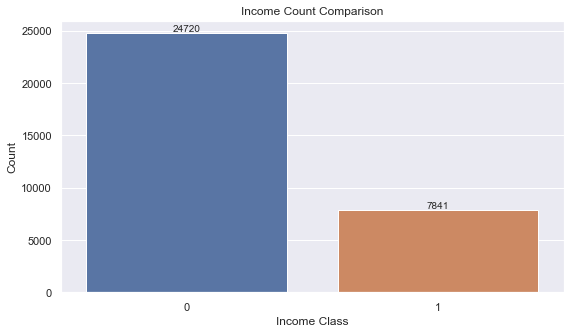

In [6]:
# Plot label
plt.figure(figsize=(9, 5))
plt.title('Income Count Comparison')
ax1 = sns.countplot(data=data_df, x='income', label='Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

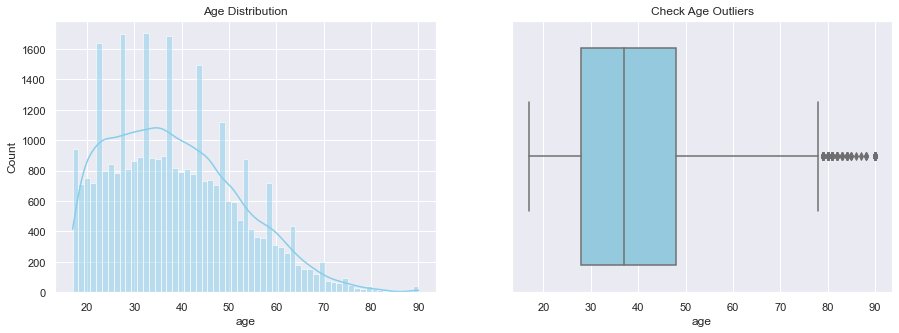

In [7]:
#age_skew = income_data['age'].skew()

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=data_df['age'], color='skyblue', kde=True, ax=ax1[0]).set(title= 'Age Distribution')
sns.boxplot(data=data_df, x='age', color='skyblue', ax=ax1[1]).set(title= 'Check Age Outliers')
plt.show()

In [8]:
# Check quarter of age
age_q1 = data_df['age'].quantile(0.25)
age_q2 = data_df['age'].quantile(0.50)
age_q3 = data_df['age'].quantile(0.75)
age_q4 = data_df['age'].quantile(1.00)
age_iqr = age_q3 - age_q1


print(f'Quartile 1 Age: {age_q1}')
print(f'Quartile 2 Age: {age_q2}')
print(f'Quartile 3 Age: {age_q3}')
print(f'Quartile 4 Age: {age_q4}')
print(f'Upper outliers: {age_q3+1.5*age_iqr}')

Quartile 1 Age: 28.0
Quartile 2 Age: 37.0
Quartile 3 Age: 48.0
Quartile 4 Age: 90.0
Upper outliers: 78.0


In [9]:
lower_bound = age_q1 - 1.0 * age_iqr
upper_bound = age_q3 + 1.0 * age_iqr
# Remove outliers
data_df_v2 = data_df[(data_df['age'] >= lower_bound) & (data_df['age'] <= upper_bound)]

In [10]:
data_df_v2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,3.0,186061,15.0,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0
5,34,3.0,216864,11.0,9,0.0,7.0,4.0,4.0,0.0,0,3770,45,38.0,0
6,38,3.0,150601,0.0,6,5.0,0.0,4.0,4.0,1.0,0,3770,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0
32557,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32558,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32559,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0


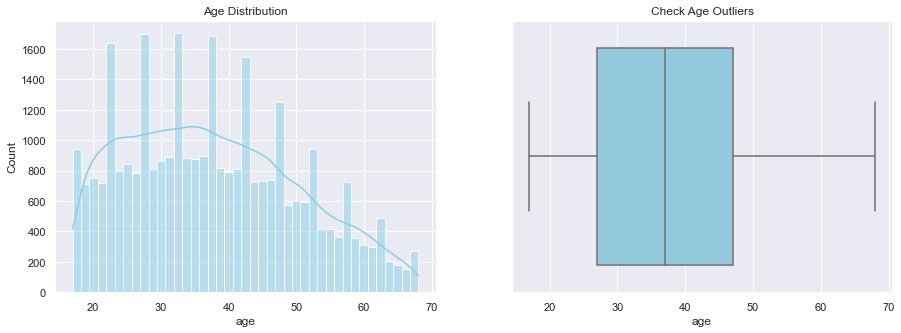

In [11]:
#age_skew = income_data['age'].skew()

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=data_df_v2['age'], color='skyblue', kde=True, ax=ax1[0]).set(title= 'Age Distribution')
sns.boxplot(data=data_df_v2, x='age', color='skyblue', ax=ax1[1]).set(title= 'Check Age Outliers')
plt.show()

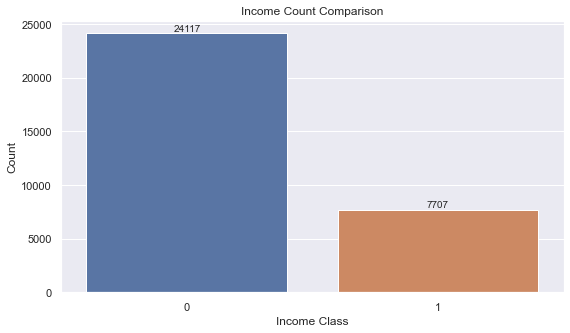

In [12]:
# Plot label
plt.figure(figsize=(9, 5))
plt.title('Income Count Comparison')
ax1 = sns.countplot(data=data_df_v2, x='income', label='Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

## Modeling Part

In [13]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score ,accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [14]:
class_names = ['<=50k', '>50k']

In [15]:
# Encode category data
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
categorical_data = data_df[categorical_columns]

encoder = OrdinalEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data)

# Replace the original categorical columns with the encoded values
data_df[categorical_columns] = encoded_categorical_data

In [16]:
X = data_df.drop(columns= ['income', 'fnlwgt', 'education'])
Y = data_df['income']

# Split train test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=13)

# Sclaer data
scaler = StandardScaler()

# Fit and transform the training and testing data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [17]:
X2 = data_df_v2.drop(columns= ['income', 'fnlwgt', 'education'])
Y2 = data_df_v2['income']

# Split train test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=13)

# Sclaer data
scaler2 = StandardScaler()

# Fit and transform the training and testing data using the scaler
x_train_scaled2 = scaler2.fit_transform(x_train2)
x_test_scaled2 = scaler2.transform(x_test2)

x_train_scaled2 = pd.DataFrame(x_train_scaled2, columns= x_train.columns)
x_test_scaled2 = pd.DataFrame(x_test_scaled2, columns= x_test.columns)

In [18]:
# Define list for check usage
training_time = []
memory_train = []
testing_time = []
memory_test = []

## Undersampling Part

In [19]:
import joblib
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours, AllKNN

In [20]:
path_save = r'C:\Users\ASUS\Desktop\Learning\masterDegree\thirdSemester\sdForDataScience\project\Milestone2\Milestone2_materials\model\under'

In [21]:
def train_undersampling(input_model, model_name, undersamplers, path_save):
    # Define the model
    base_model = input_model
    # Apply and evaluate each oversampler
    for undersampler_name, undersampler in undersamplers:
        X_resampled, y_resampled = undersampler.fit_resample(x_train2, y_train2)

        tmp_scaler = StandardScaler()
        x_train_resampled_scaled = scaler.fit_transform(X_resampled)
        x_test_resampled_scaled = scaler.transform(x_test2)

        # Train the model with the resampled data
        trained_model = base_model.fit(x_train_resampled_scaled, y_resampled)

        # Make predictions on the test data
        y_pred = trained_model.predict(x_test_resampled_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test2, y_pred)
        precision = precision_score(y_test2, y_pred, average='weighted')
        recall = recall_score(y_test2, y_pred, average='weighted')
        f1 = f1_score(y_test2, y_pred, average='weighted')
        # Confusion natric
        mat = confusion_matrix(y_test2, y_pred)
        TN = mat[0][0]
        FN = mat[1][0]
        TP = mat[1][1]
        FP = mat[0][1]
        
        file_name = f'\{model_name}_{undersampler_name}.pkl'
        print(f"Undersampler: {undersampler_name}, Model: {model_name}")
        print(f'Accuracy: {accuracy*100:.4f}')
        print(f'Recall: {recall*100:.4f}')
        print(f'Precision: {precision*100:.4f}')
        print(f'F1-Score: {f1*100:.4f}')
        print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
        print(f'Saving: {file_name}')
        joblib.dump(trained_model, path_save+file_name)
        # Plot cm matrix
        fig , ax = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
        disp = plt.title(f'Confusion Matrix of {model_name} {undersampler_name} Prediction')
        plt.show()

In [22]:
# Define a list of undersampling methods
undersamplers = [
    ('RandomUnder-sampler', RandomUnderSampler(sampling_strategy='majority', random_state=13)),
    ('Tomek_Links', TomekLinks(sampling_strategy='majority')),
    ('Edited_Nearest_Neighbors', EditedNearestNeighbours(sampling_strategy='majority')),
    ('AllKNN', AllKNN(sampling_strategy='majority'))
]

## Random Forest Under

Undersampler: RandomUnder-sampler, Model: RF Model
Accuracy: 81.5145
Recall: 81.5145
Precision: 85.0483
F1-Score: 82.4604
TP: 1873, FP: 1357, TN: 5910, FN: 408
Saving: \RF Model_RandomUnder-sampler.pkl


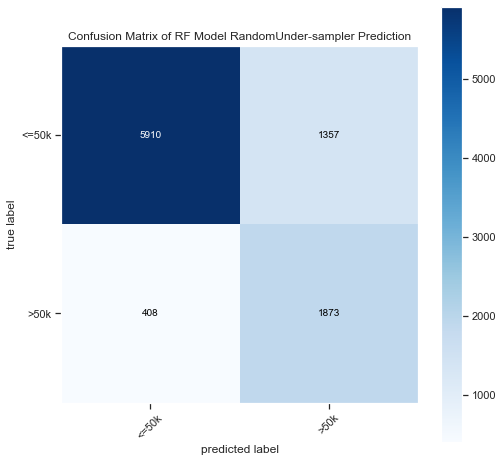

Undersampler: Tomek_Links, Model: RF Model
Accuracy: 85.3687
Recall: 85.3687
Precision: 85.0992
F1-Score: 85.2129
TP: 1515, FP: 631, TN: 6636, FN: 766
Saving: \RF Model_Tomek_Links.pkl


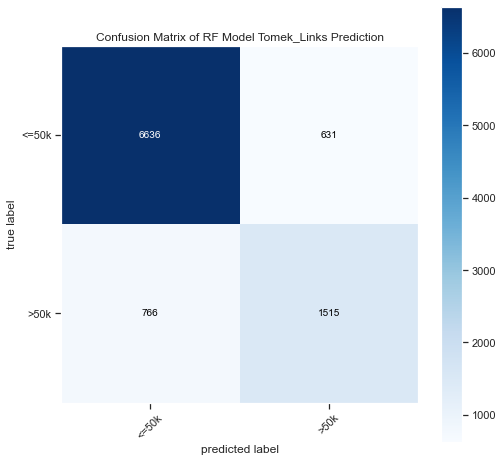

Undersampler: Edited_Nearest_Neighbors, Model: RF Model
Accuracy: 82.1743
Recall: 82.1743
Precision: 85.6098
F1-Score: 83.0794
TP: 1899, FP: 1320, TN: 5947, FN: 382
Saving: \RF Model_Edited_Nearest_Neighbors.pkl


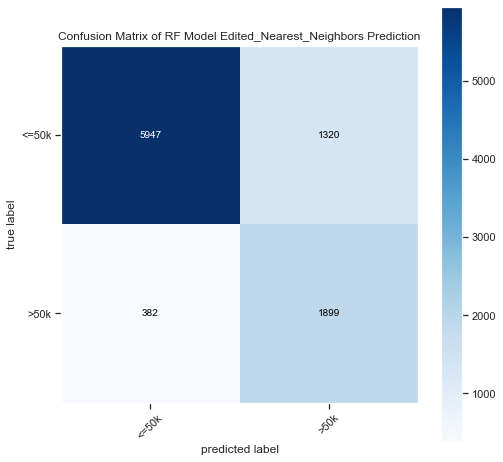

Undersampler: AllKNN, Model: RF Model
Accuracy: 81.5668
Recall: 81.5668
Precision: 85.2422
F1-Score: 82.5302
TP: 1891, FP: 1370, TN: 5897, FN: 390
Saving: \RF Model_AllKNN.pkl


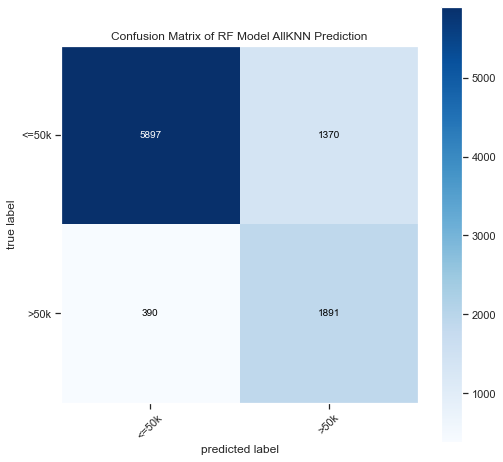

In [23]:
# Base model
model_name = 'RF Model'
rf_base = RandomForestClassifier(n_estimators=300)
train_undersampling(rf_base, model_name, undersamplers, path_save)

## LightGBM Model Under

Undersampler: RandomUnder-sampler, Model: LightGBM
Accuracy: 82.9179
Recall: 82.9179
Precision: 86.4347
F1-Score: 83.8029
TP: 1949, FP: 1299, TN: 5968, FN: 332
Saving: \LightGBM_RandomUnder-sampler.pkl


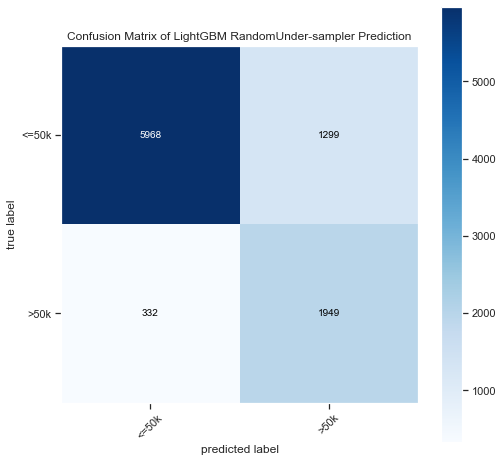

Undersampler: Tomek_Links, Model: LightGBM
Accuracy: 86.8873
Recall: 86.8873
Precision: 86.5876
F1-Score: 86.6982
TP: 1565, FP: 536, TN: 6731, FN: 716
Saving: \LightGBM_Tomek_Links.pkl


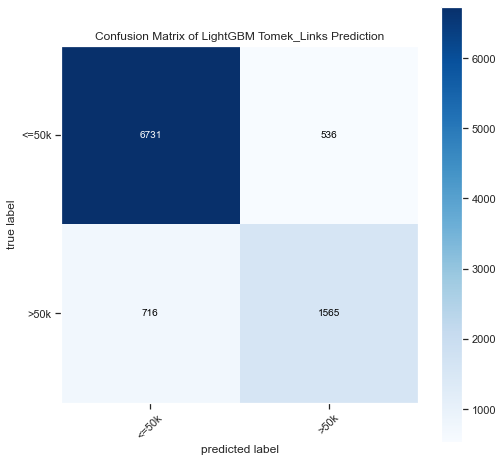

Undersampler: Edited_Nearest_Neighbors, Model: LightGBM
Accuracy: 83.3368
Recall: 83.3368
Precision: 86.6204
F1-Score: 84.1739
TP: 1947, FP: 1257, TN: 6010, FN: 334
Saving: \LightGBM_Edited_Nearest_Neighbors.pkl


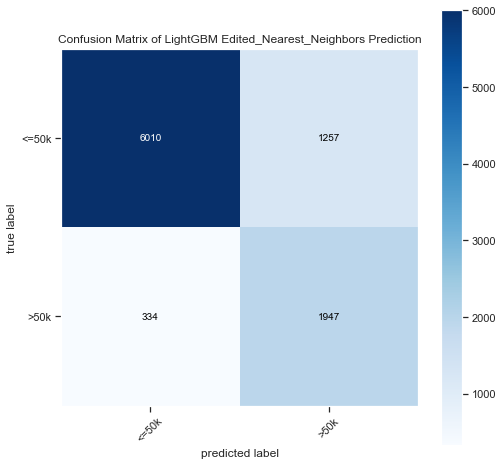

Undersampler: AllKNN, Model: LightGBM
Accuracy: 82.8132
Recall: 82.8132
Precision: 86.2168
F1-Score: 83.6877
TP: 1931, FP: 1291, TN: 5976, FN: 350
Saving: \LightGBM_AllKNN.pkl


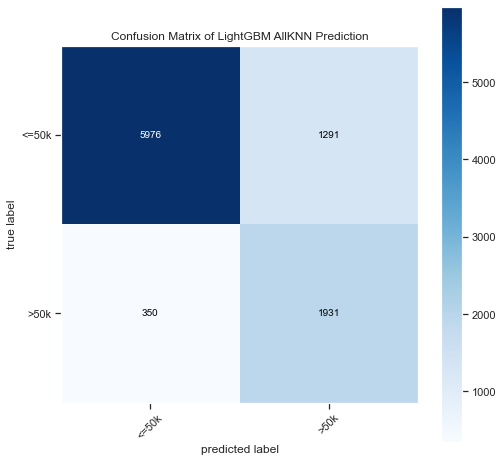

In [24]:
# Base model
model_name = 'LightGBM'
lightGBM_base = LGBMClassifier(n_estimators=300, verbose=-1)
train_undersampling(lightGBM_base, model_name, undersamplers, path_save)

## SVM Model Under

Undersampler: RandomUnder-sampler, Model: SVM
Accuracy: 79.0218
Recall: 79.0218
Precision: 85.2085
F1-Score: 80.3799
TP: 1994, FP: 1716, TN: 5551, FN: 287
Saving: \SVM_RandomUnder-sampler.pkl


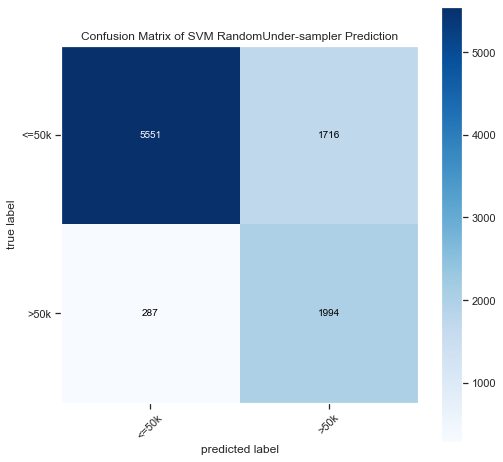

Undersampler: Tomek_Links, Model: SVM
Accuracy: 85.0754
Recall: 85.0754
Precision: 84.3474
F1-Score: 84.3261
TP: 1294, FP: 438, TN: 6829, FN: 987
Saving: \SVM_Tomek_Links.pkl


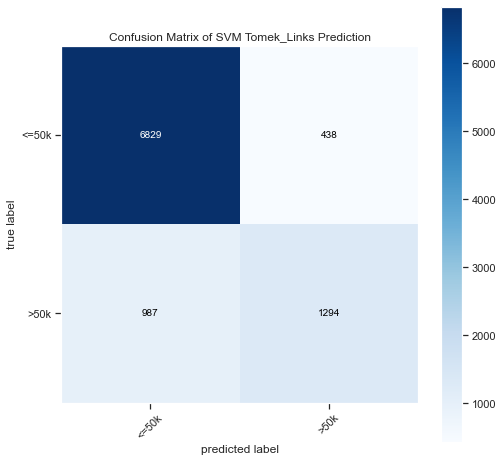

Undersampler: Edited_Nearest_Neighbors, Model: SVM
Accuracy: 81.6087
Recall: 81.6087
Precision: 84.8016
F1-Score: 82.5002
TP: 1841, FP: 1316, TN: 5951, FN: 440
Saving: \SVM_Edited_Nearest_Neighbors.pkl


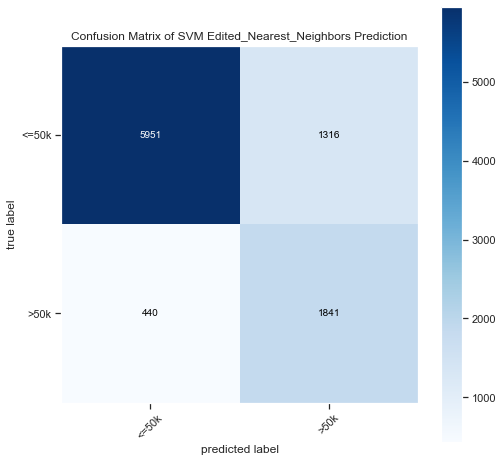

Undersampler: AllKNN, Model: SVM
Accuracy: 81.2840
Recall: 81.2840
Precision: 84.5132
F1-Score: 82.1934
TP: 1827, FP: 1333, TN: 5934, FN: 454
Saving: \SVM_AllKNN.pkl


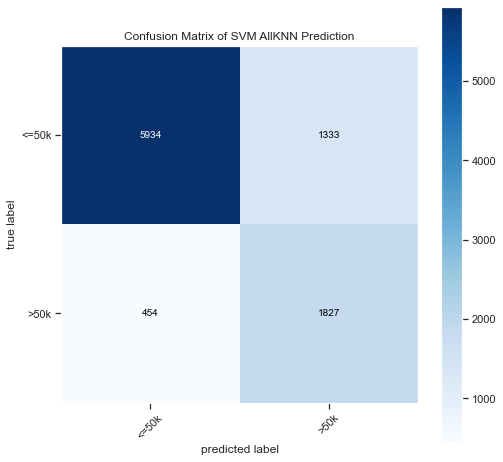

In [25]:
# Training model
model_name = 'SVM'
svm_base = SVC()
train_undersampling(svm_base, model_name, undersamplers, path_save)

## MLP Model Under

Undersampler: RandomUnder-sampler, Model: MLP
Accuracy: 80.0691
Recall: 80.0691
Precision: 84.7628
F1-Score: 81.2279
TP: 1912, FP: 1534, TN: 5733, FN: 369
Saving: \MLP_RandomUnder-sampler.pkl


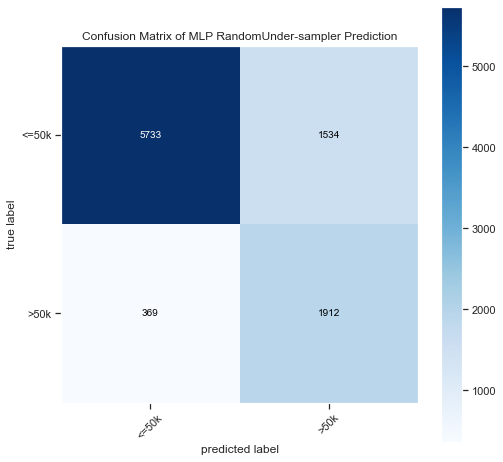

Undersampler: Tomek_Links, Model: MLP
Accuracy: 85.2011
Recall: 85.2011
Precision: 84.7228
F1-Score: 84.8799
TP: 1443, FP: 575, TN: 6692, FN: 838
Saving: \MLP_Tomek_Links.pkl


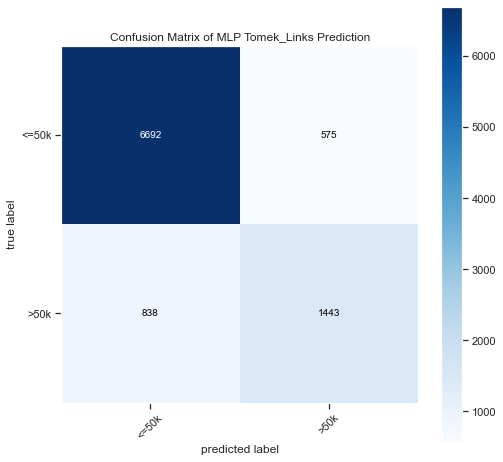

Undersampler: Edited_Nearest_Neighbors, Model: MLP
Accuracy: 79.8597
Recall: 79.8597
Precision: 84.9308
F1-Score: 81.0699
TP: 1937, FP: 1579, TN: 5688, FN: 344
Saving: \MLP_Edited_Nearest_Neighbors.pkl


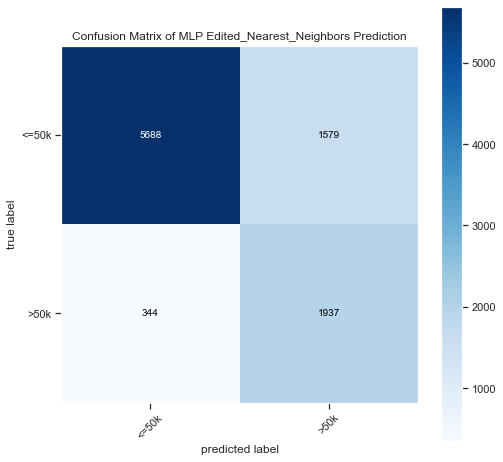

Undersampler: AllKNN, Model: MLP
Accuracy: 81.4726
Recall: 81.4726
Precision: 84.5450
F1-Score: 82.3499
TP: 1820, FP: 1308, TN: 5959, FN: 461
Saving: \MLP_AllKNN.pkl


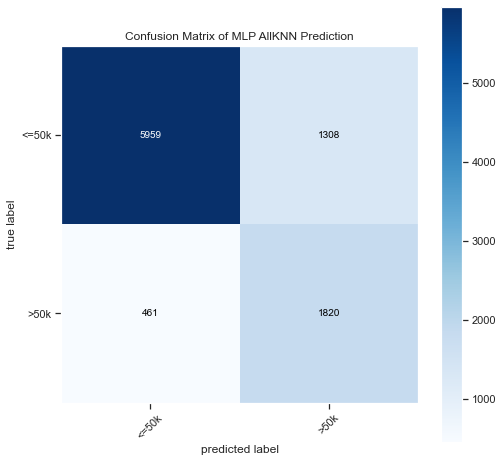

In [26]:
# Build MLP model
model_name = 'MLP'
mlp_base = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=400)
train_undersampling(mlp_base, model_name, undersamplers, path_save)

## LR Model Under

Undersampler: RandomUnder-sampler, Model: LR
Accuracy: 77.6917
Recall: 77.6917
Precision: 82.2227
F1-Score: 78.9440
TP: 1765, FP: 1614, TN: 5653, FN: 516
Saving: \LR_RandomUnder-sampler.pkl


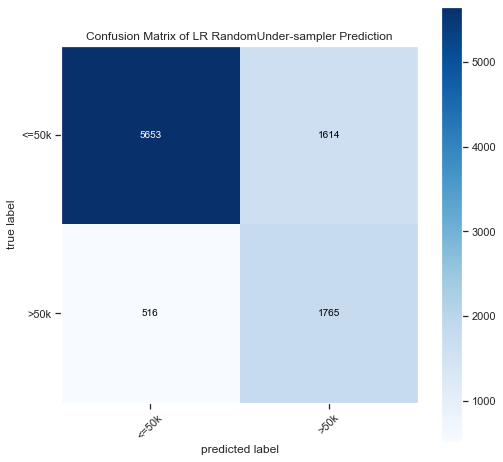

Undersampler: Tomek_Links, Model: LR
Accuracy: 82.8341
Recall: 82.8341
Precision: 81.7335
F1-Score: 81.6749
TP: 1112, FP: 470, TN: 6797, FN: 1169
Saving: \LR_Tomek_Links.pkl


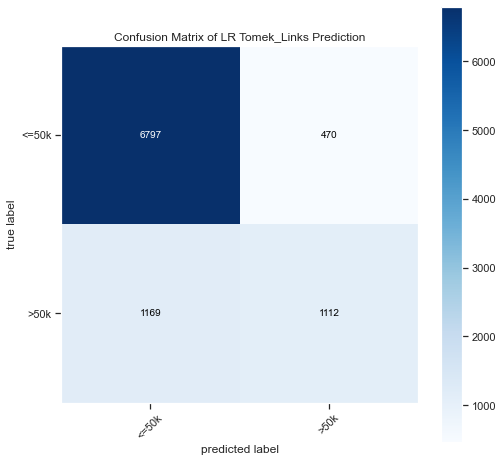

Undersampler: Edited_Nearest_Neighbors, Model: LR
Accuracy: 80.4881
Recall: 80.4881
Precision: 81.8503
F1-Score: 81.0104
TP: 1555, FP: 1137, TN: 6130, FN: 726
Saving: \LR_Edited_Nearest_Neighbors.pkl


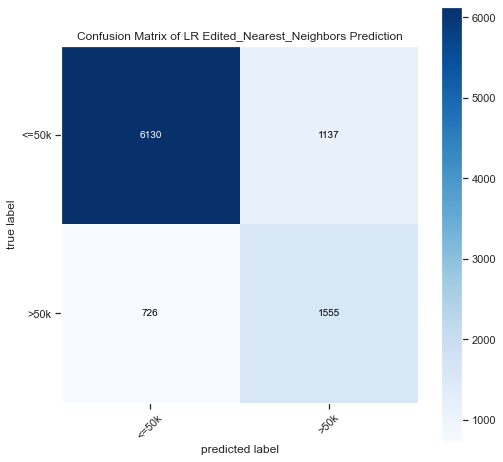

Undersampler: AllKNN, Model: LR
Accuracy: 80.0901
Recall: 80.0901
Precision: 81.7046
F1-Score: 80.6904
TP: 1567, FP: 1187, TN: 6080, FN: 714
Saving: \LR_AllKNN.pkl


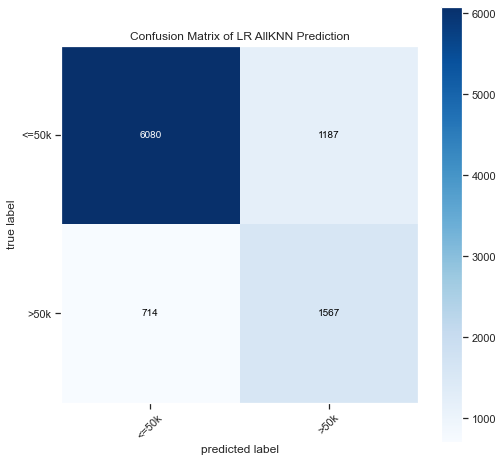

In [27]:
# Build model
model_name = 'LR'
lr_base = LogisticRegression()
train_undersampling(lr_base, model_name, undersamplers, path_save)

## K-NN Model Under

Undersampler: RandomUnder-sampler, Model: K-NN
Accuracy: 78.4876
Recall: 78.4876
Precision: 83.3744
F1-Score: 79.7476
TP: 1844, FP: 1617, TN: 5650, FN: 437
Saving: \K-NN_RandomUnder-sampler.pkl


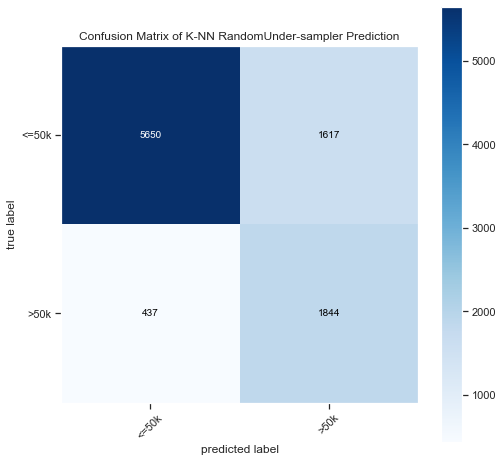

Undersampler: Tomek_Links, Model: K-NN
Accuracy: 83.6091
Recall: 83.6091
Precision: 83.3560
F1-Score: 83.4695
TP: 1444, FP: 728, TN: 6539, FN: 837
Saving: \K-NN_Tomek_Links.pkl


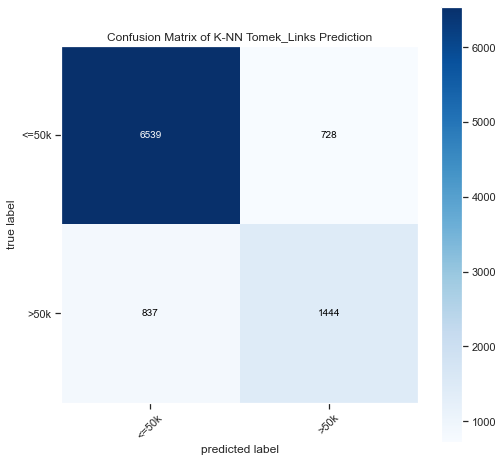

Undersampler: Edited_Nearest_Neighbors, Model: K-NN
Accuracy: 80.8337
Recall: 80.8337
Precision: 83.7865
F1-Score: 81.7130
TP: 1771, FP: 1320, TN: 5947, FN: 510
Saving: \K-NN_Edited_Nearest_Neighbors.pkl


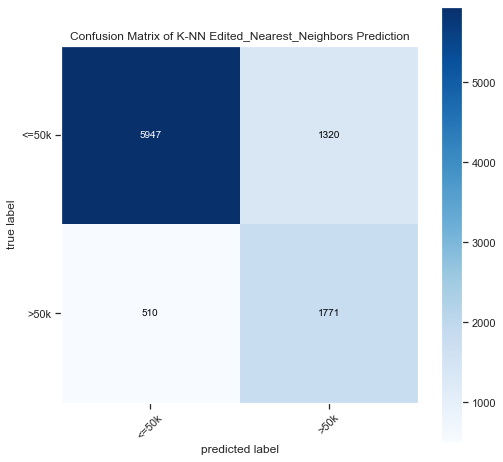

Undersampler: AllKNN, Model: K-NN
Accuracy: 81.1793
Recall: 81.1793
Precision: 83.7933
F1-Score: 81.9854
TP: 1751, FP: 1267, TN: 6000, FN: 530
Saving: \K-NN_AllKNN.pkl


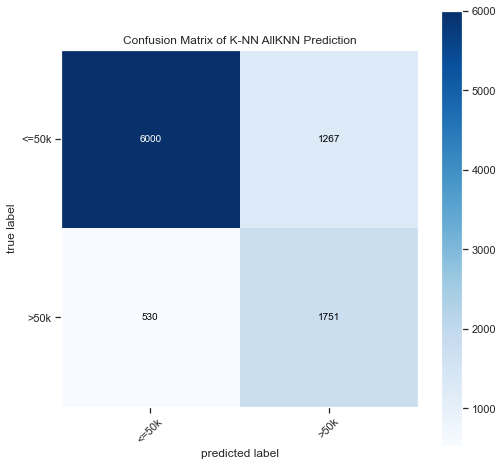

In [28]:
# Build model
model_name = 'K-NN'
knn_base = KNeighborsClassifier(n_neighbors = 7)
train_undersampling(knn_base, model_name, undersamplers, path_save)